## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


## 1) Get familiar with data

In [1]:
import pandas as pd

In [2]:
ls -l

total 1018744
-rw-rw-r-- 1 dsc dsc 554970628 may 31 12:52 bookings.csv.bz2
-rw-rw-r-- 1 dsc dsc   4232732 jun  1 09:41 bookings.sample.csv
-rw-rw-r-- 1 dsc dsc    535893 jun  1 09:24 bookings.sample.csv.bz2
-rw-rw-r-- 1 dsc dsc     15476 jun  1 13:57 ch_01-Empty.ipynb
-rw-rw-r-- 1 dsc dsc     82636 jun  1 13:57 ch_02-Empty.ipynb
-rw-rw-r-- 1 dsc dsc     10814 jun  7 17:14 ch_03-Empty.ipynb
-rw-rw-r-- 1 dsc dsc      8019 may 31 12:55 ch_04-Empty.ipynb
-rw-rw-r-- 1 dsc dsc     19364 jun  1 13:57 ch_05b-empty.ipynb
-rw-rw-r-- 1 dsc dsc     30965 jun  1 13:57 ch_05-empty.ipynb
-rw-rw-r-- 1 dsc dsc 483188920 may 31 12:52 searches.csv.bz2
-rw-rw-r-- 1 dsc dsc     73325 jun  1 13:07 top_airports.csv


In [3]:
s=pd.read_csv('./searches.csv.bz2', sep="^", nrows=10000)

In [4]:
s.shape

(10000, 45)

In [5]:
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [6]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
3508,2013-01-04,18:23:42,MPT,3c9957fa4bf99f1c22f3eae347b9dcb3,US,SAV,ICN,0,1,SAV,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAX
7732,2013-01-08,17:36:12,MPT,440642a9bdaeb6287f826cefd73255e8,US,PIT,AMM,1,2,PIT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
2943,2013-01-03,14:35:43,FFP,82943557f28d5c67a74dba06d063c79c,DK,CPH,NRT,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7744,2013-01-08,08:36:11,FCP,3565e31495ecfd46fa018339d20382b1,SA,TUU,JED,0,1,TUU,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED
7888,2013-01-08,01:09:08,FFP,0f07a8308318715c636fda4185ed683d,NL,AMS,VNO,1,2,AMS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,AMS


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
2472,2013-01-03,22:05:23,MPT,0c31bf715415e7171d2a9602146fa2a1,AT,VIE,SOF,1,2,VIE,SOF,2013-02-01,NaN,NaN,SOF,VIE,2013-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LNZ
3136,2013-01-04,08:30:21,MPT,657f25ccd0a4120f111ff0014bd1816f,NO,OSL,AMM,1,2,OSL,AMM,2013-06-15,JJ,NaN,AMM,OSL,2013-08-11,JJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
6931,2013-01-07,21:13:41,MPT,ad5e8547187c6456a514c30f9bfc09ef,US,NYC,PEK,1,2,NYC,PEK,2013-09-01,NaN,NaN,PEK,NYC,2013-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DCA
3601,2013-01-04,13:08:50,FXA,7a678dbac0a7ebbdec3b2e63e2565906,DE,RLG,QYG,0,2,RLG,QYG,2013-01-22,4L,F,QYG,MUC,2013-01-22,4L,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MUC
4366,2013-01-05,09:13:24,FXP,17092964f6259b4387ecfa65261c599e,AU,SYD,LHR,0,1,SYD,LHR,2013-07-04,BP,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,e044f800a55cbf2b530959b1b14e986f,SYD


In [9]:
s.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [10]:
list(s.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [11]:
s.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,10000.000000,10000.000000,10000.0,10000.0,10000.0
mean,0.700700,1.833600,0.0,0.0,0.0
std,0.457974,0.731823,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,9.000000,0.0,0.0,0.0


In [12]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

## 2) Select the columns of interest

## 3) What to do with NaN

In [15]:
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()

In [16]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [17]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null object
Destination    10000 non-null object
dtypes: object(2)
memory usage: 234.4+ KB


## 4) Make action plan


In [ ]:
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()

In [18]:
#example that did not work in past to me
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination']\
              , parse_dates=['Date'], nrows=10000)
s=s.dropna()

In [19]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null datetime64[ns]
Destination    10000 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 234.4+ KB


### 4.1) filter out the the searches for MAD, BCN, AGP
take only the rows having MAD, BCN or AGP as destination

In [20]:
sFilter=s[ (s['Destination']=="MAD") | (s['Destination']=="AGP") | (s['Destination']=="BCN")  ]

In [23]:
sFilter2=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ].copy()

In [24]:
sFilter2['test']=1

In [25]:
df=pd.DataFrame({'x':[1,2]})

In [26]:
df_sub=df[0:1].copy()

In [27]:
df

,x
0,1
1,2


In [28]:
df_sub

,x
0,1


In [29]:
df_sub.x=-1

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
df

,x
0,-1
1,2


In [31]:
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()
s=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ]
s['YYYY-mm']=s['Date'].str[0:7]

In [46]:
s_gr=s.groupby(['YYYY-mm','Destination'], as_index=False).count()
#s_gr=s.groupby(['YYYY-mm','Destination']).count()

In [47]:
s_gr.head()

,YYYY-mm,Destination,Date
0,2013-01,AGP,48
1,2013-01,BCN,162
2,2013-01,MAD,125


In [45]:
s_gr.head().reset_index()

,YYYY-mm,Destination,Date
0,2013-01,AGP,48
1,2013-01,BCN,162
2,2013-01,MAD,125


In [37]:
s2=s.copy()
del s2["Date"]

In [38]:
s2.head()

,Destination,YYYY-mm
4,MAD,2013-01
93,AGP,2013-01
113,BCN,2013-01
147,AGP,2013-01
151,MAD,2013-01


In [49]:
s_gr2=s2.groupby(['YYYY-mm','Destination']).size()

In [ ]:
s_gr2.head()

In [44]:
type(s_gr2)

pandas.core.series.Series

In [52]:
import pandas as pd
s=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
s=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ]
s['YYYY-mm']=s['Date'].str[0:7]
s_gr=s.groupby(['YYYY-mm','Destination'], as_index=False).count()


In [56]:
s_gr.shape

(12, 3)

In [57]:
s_gr.sample()

,YYYY-mm,Destination,Date
2,2013-01,MAD,425


In [58]:
A=s_gr.pivot('YYYY-mm','Destination', 'Date')

In [59]:
A

Destination,AGP,BCN,MAD
YYYY-mm,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


Populating the interactive namespace from numpy and matplotlib


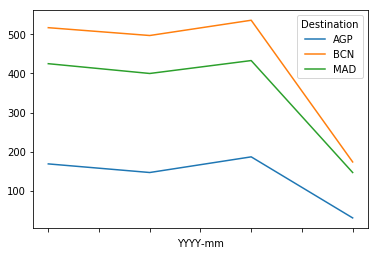

In [62]:
%pylab inline
A.plot()

Populating the interactive namespace from numpy and matplotlib


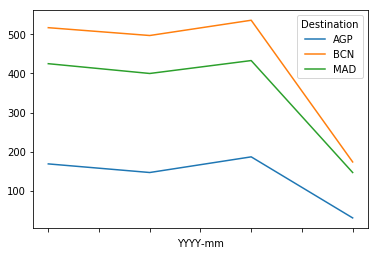

In [63]:
import pandas as pd
%pylab inline

s=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
s=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ]
s['YYYY-mm']=s['Date'].str[0:7]
s_gr=s.groupby(['YYYY-mm','Destination'], as_index=False).count()
A=s_gr.pivot('YYYY-mm','Destination', 'Date')
A.plot()

## 5) Adjust the code to work with Big data

In [65]:
%time
import pandas as pd
%pylab inline
sc=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination'], nrows=100000, chunksize=10000)
res=pd.DataFrame()
for i,chunk in enumerate(sc):
    print (i)
    s=chunk.dropna()
    s=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ]
    s['YYYY-mm']=s['Date'].str[0:7]
    s_gr=s.groupby(['YYYY-mm','Destination'], as_index=False).count()
    res=res.append(s_gr)
    
res_all=res.groupby(['YYYY-mm','Destination'], as_index=False).sum()
    
A=res_all.pivot('YYYY-mm','Destination', 'Date')
A.plot()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Populating the interactive namespace from numpy and matplotlib
0
1
2
3
4
5
6
7
8
9


In [66]:
res

,YYYY-mm,Destination,Date
0,2013-01,AGP,48
1,2013-01,BCN,162
2,2013-01,MAD,125
0,2013-01,AGP,60
1,2013-01,BCN,156
2,2013-01,MAD,141
0,2013-01,AGP,56
1,2013-01,BCN,180
2,2013-01,MAD,148
0,2013-01,AGP,5


In [67]:
res_all=res.groupby(['YYYY-mm','Destination'], as_index=False).sum()


In [68]:
res_all

,YYYY-mm,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


Populating the interactive namespace from numpy and matplotlib
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
CPU times: user 4min 25s, sys: 2.31 s, total: 4min 27s
Wall time: 4min 24s


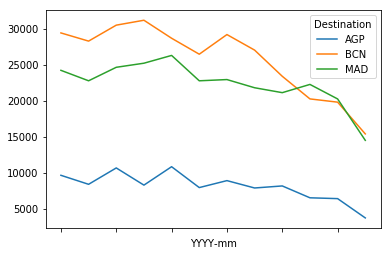

In [71]:
%%time
import pandas as pd
%pylab inline
sc=pd.read_csv('./searches.csv.bz2', sep="^", usecols=['Date', 'Destination'], chunksize=1000000)
res=pd.DataFrame()
for i,chunk in enumerate(sc):
    print (i)
    s=chunk.dropna()
    s=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ]
    s['YYYY-mm']=s['Date'].str[0:7]
    s_gr=s.groupby(['YYYY-mm','Destination'], as_index=False).count()
    res=res.append(s_gr)
    
res_all=res.groupby(['YYYY-mm','Destination'], as_index=False).sum()
    
A=res_all.pivot('YYYY-mm','Destination', 'Date')
A.plot()